In [27]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/BRACBANK.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP   TRADE  VALUE (mn)     VOLUME
0  439 2018-05-08     BRACBANK  68.3  ...  69.1   588.0      34.442   502038.0
1  438 2018-06-08     BRACBANK  71.6  ...  68.2  1826.0     125.978  1796391.0
2  437 2018-07-08     BRACBANK  73.7  ...  71.3  1811.0     111.683  1525306.0
3  436 2018-08-08     BRACBANK  74.3  ...  73.6  1900.0     144.013  1952596.0
4  435 2018-09-08     BRACBANK  73.5  ...  74.5  1207.0      83.986  1136820.0

[5 rows x 12 columns]

In [2]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)     VOLUME
36  403 2018-01-10     BRACBANK  71.5  ...  71.8  308.0      10.398   144998.0
59  380 2018-01-11     BRACBANK  69.6  ...  70.4  703.0      46.859   667978.0
37  402 2018-02-10     BRACBANK  72.3  ...  71.3  352.0      12.633   175816.0
79  360 2018-02-12     BRACBANK  72.9  ...  72.7  247.0      15.192   209760.0
16  423 2018-03-09     BRACBANK  76.7  ...  77.0  952.0      84.725  1104301.0

[5 rows x 12 columns]

In [3]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE  LTP*  HIGH  ...   YCP  TRADE  VALUE (mn)    VOLUME
DATE                                      ...                                   
2018-01-10  403     BRACBANK  71.5  72.4  ...  71.8  308.0      10.398  144998.0
2018-01-11  380     BRACBANK  69.6  70.6  ...  70.4  703.0      46.859  667978.0
2018-02-10  402     BRACBANK  72.3  72.4  ...  71.3  352.0      12.633  175816.0

[3 rows x 11 columns]

In [28]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [29]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [30]:
df['volatility'] = df['volatility']*100

In [31]:
import matplotlib.pyplot as plt 

In [32]:
df=df.reset_index()['volatility']

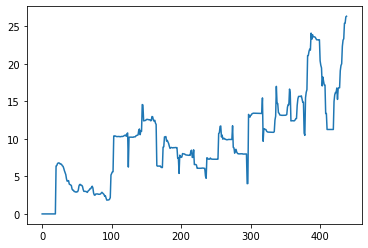

In [ ]:
plt.plot(df)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df.shape

(439, 1)

In [34]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [ ]:

training_size,test_size

(307, 132)

In [35]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [36]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [38]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [39]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [40]:
from keras.optimizers import Adam

In [41]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 267ms/step - loss: 0.0647 - val_loss: 0.2502
Epoch 2/100
7/7 [==============================] - 1s 134ms/step - loss: 0.0130 - val_loss: 0.0780
Epoch 3/100
7/7 [==============================] - 1s 137ms/step - loss: 0.0080 - val_loss: 0.1262
Epoch 4/100
7/7 [==============================] - 1s 135ms/step - loss: 0.0072 - val_loss: 0.1018
Epoch 5/100
7/7 [==============================] - 1s 125ms/step - loss: 0.0063 - val_loss: 0.0995
Epoch 6/100
7/7 [==============================] - 1s 128ms/step - loss: 0.0065 - val_loss: 0.1020
Epoch 7/100
7/7 [==============================] - 1s 125ms/step - loss: 0.0049 - val_loss: 0.1069
Epoch 8/100
7/7 [==============================] - 1s 124ms/step - loss: 0.0047 - val_loss: 0.0964
Epoch 9/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0050 - val_loss: 0.0722
Epoch 10/100
7/7 [==============================] - 1s 124ms/step - loss: 0.0047 - val_loss: 0.0717
Epoch 11/

In [44]:
from google.colab import drive

In [20]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

In [45]:
filepath = "/content/drive/MyDrive/stock price_LSTM/modelsBRACBANK/model.h5"
model.save(filepath)
from keras.models import load_model
f1 = '/content/drive/MyDrive/stock price_LSTM/modelsBRACBANK/model.h5'
model = load_model(f1)

In [22]:
import tensorflow as tf
from sklearn.metrics import r2_score

In [23]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [25]:
Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_predict))
RMSE

2.7113386817151968

In [26]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,test_predict)
print('MAE: %f' % mae)

MAE: 2.361265


In [ ]:
Y_test

array([[17.15806749],
       [13.36726854],
       [13.36726854],
       [11.24067114],
       [11.24067114],
       [11.24067114],
       [11.24067114],
       [11.24067114],
       [11.24067114],
       [11.24067114],
       [11.24067114],
       [11.24067114],
       [11.24067114],
       [14.94976376],
       [15.84083871],
       [16.15588539],
       [16.15588539],
       [16.7584975 ],
       [15.24011493],
       [16.73421407],
       [16.78685133],
       [16.78685133],
       [19.05954192],
       [19.75470198],
       [19.9824604 ],
       [22.31636981],
       [23.13042591],
       [23.31064053],
       [25.36381592],
       [25.3927773 ],
       [26.23070224]])

In [ ]:
test_predict

array([[12.432685 ],
       [12.464992 ],
       [10.9667   ],
       [ 9.644196 ],
       [ 8.25991  ],
       [ 7.6048746],
       [ 7.6561327],
       [ 8.086735 ],
       [ 8.604564 ],
       [ 9.039952 ],
       [ 9.334367 ],
       [ 9.503292 ],
       [ 9.594001 ],
       [ 9.661043 ],
       [11.097314 ],
       [12.891187 ],
       [14.159133 ],
       [14.603469 ],
       [14.717802 ],
       [14.054193 ],
       [13.977648 ],
       [14.2255745],
       [14.475049 ],
       [15.497665 ],
       [16.607828 ],
       [17.233122 ],
       [18.18504  ],
       [19.012844 ],
       [19.308094 ],
       [19.904667 ],
       [20.227558 ]], dtype=float32)

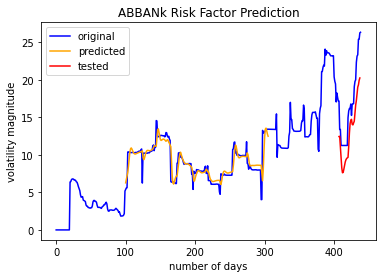

In [ ]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')
plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ABBANk Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [ ]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.7804778]
101
1 day input [0.51210885 0.50923438 0.50037438 0.49974268 0.49855523 0.49868973
 0.49866203 0.4986671  0.49866217 0.49876539 0.49905756 0.50038074
 0.50248555 0.5401781  0.55325047 0.55200546 0.63149407 0.61007954
 0.47019818 0.47146165 0.47149886 0.47133238 0.47069116 0.4711255
 0.47560073 0.48161761 0.4827215  0.54931664 0.58232504 0.59445329
 0.59453452 0.59466735 0.59387626 0.59729281 0.58117309 0.56485044
 0.56485044 0.4083372  0.39737828 0.58782121 0.61545104 0.62824825
 0.80012972 0.80161183 0.82258751 0.8334233  0.82884295 0.91463601
 0.88356878 0.90701564 0.8957743  0.8957743  0.89587319 0.89331425
 0.88707659 0.8806701  0.8808582  0.8808582  0.8808582  0.8808582
 0.77410108 0.75168507 0.73844966 0.64743691 0.69239078 0.66983093
 0.65207297 0.65207297 0.50800794 0.50800794 0.42718901 0.42718901
 0.42718901 0.42718901 0.42718901 0.42718901 0.42718901 0.42718901
 0.42718901 0.42718901 0.56814888 0.60201318 0.61398617 0.61398617
 0.63688777 0.57918335 0.6359649  0.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df[339:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Forecasting')
plt.legend(loc='best')
plt.show(block=False)

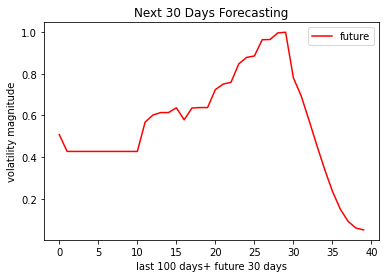

In [ ]:
df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

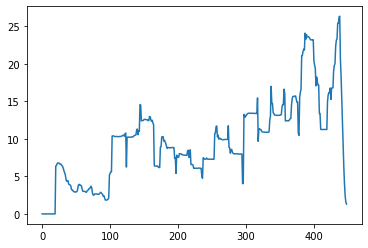

In [ ]:
plt.plot(df3)